# LEGO Regression Project

## Introduction 

In this notebook you'll perform a simple linear regression analysis and report the findings of your model, including both predictive model performance metrics and interpretation of fitted model parameters.

## Objectives

You will be able to:

* Write an SQL query to pull data from an SQL database
* Perform a simple linear regression analysis 
* Evaluate your model and interpret its predictive performance metrics
* Apply an inferential lens to interpret relationships betyouen variables identified by the model

# Task: Develop a LEGO Pricing Algorithm

![pile of legos](images/legos.jpg)

Photo by <a href="https://unsplash.com/@xavi_cabrera?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Xavi Cabrera</a> on <a href="/s/photos/lego?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

WE ARE FOCUSING ON THE RELATIONSHIP BETWEEN THE ATTRIBUTES OF A LEGO AND ITS PRICE

## Business Understanding

You just got hired by LEGO! Your first project is going to be to develop a pricing algorithm in order to analyze the value of individual lego pieces.

The primary purpose of this algorithm is *inferential*, meaning that **your model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. You will apply your knowledge of statistics to include appropriate caveats about these relationships.

## Data Understanding

You have been given access to an sql database containing over 700 LEGO sets released in the past, including attributes of those sets as well as their prices.

You do not need to worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

## Loading the Data

The database for this project is stored at the path `data/legos.db` in this project repository. The entity relational diagram (E.R.D) for the legos database is displayed below. 

To load in the data, you will need to complete the following tasks:
- Open up a connection to the legos database
- Write an sql query to join all three tables together
- Run the sql query and load the joined tables into a pandas dataframe
    - The easiest method for completing this task is to use the `pd.read_sql` function ([Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html))
    - Store the pandas dataframe in a variable called `df`

![Entity Relational Diagram](images/erd.png)

In [150]:
# Run this cell without changes
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
# Replace None with your code

connection = sqlite3.connect('data/legos.db') #opening up a connection to the legos database

#creating a query that joins the 3 tables
sql_query = """
SELECT * 
FROM difficulty AS d
JOIN product_info AS p
ON d."Prod Id" = p."Prod Id"
JOIN metrics AS m
ON d."Prod Id" = m."Prod Id"

"""
#reading the query and printing it as a dataframe
df = pd.read_sql(sql_query,connection)
print('The join of the 3 tables produces the dataframe:')
df = df.T.drop_duplicates().T
display(df)
df.shape

The join of the 3 tables produces the dataframe:


,Prod Id,Min Age,Max Age,Difficulty Level,Set Name,Prod Desc,Theme Name,Piece Count,Num Reviews,Star Rating,List Price
0,60123,7.0,12.0,1,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,3.0,4.3,$49.99
1,71246,7.0,14.0,1,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,3.0,4.7,$30.362
2,10616,1.5,5.0,1,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,3.0,5.0,$19.99
3,31079,8.0,12.0,1,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,5.0,4.4,$34.99
4,42057,8.0,14.0,1,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,9.0,4.7,$19.99
...,...,...,...,...,...,...,...,...,...,...,...
879,60146,5.0,12.0,1,Stunt Truck,Strap in and jump some ramps!,City,91,8.0,4.8,$9.99
880,70313,8.0,14.0,2,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,3.0,4.7,$19.99
881,70313,8.0,14.0,2,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,3.0,4.7,None
882,70313,8.0,14.0,2,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,3.0,4.7,$19.99


(884, 11)

## Analysis Requirements

### 1. Data Exploration and Cleaning

During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases) should be dropped. 

### 2. Create a Baseline Model

In order to evaluate how youll a simple linear regression model is understanding the dependent variable, you will begin by first creating a model that predicts the mean of the dependent variable for every observation. Predicting the mean of `list_price` can be considered a highly naive model. If our simple linear regression model performs worse than this naive approach, you can safely say that it is not a very good model. 

### 3. Interpret a Correlation Heatmap

To develop a simple linear regression model, you will identify the independent variable that is most correlated with our dependent variable. To do this this you will plot a correlation heatmap to identify the variable most correlated with `list_price`.

### 4. Build a Simple Linear Regression Model

Now, create a linear regression model using the `statsmodels` library where the most correlated feature is used as the independent variable and the dependent variable is properly set. 

### 5. Interpret the Simple Linear Regression Model

Once the model has been fit, the coefficient for our independent variable, its p-value, and the coefficient confidence interval should be interpeted. You should ask ourselves whether or not the relationship your model is finding seems plausible. 

### 6. Evaluate the Simple Linear Regression Model

Before you can make a final assessment of our model, you need to compare its metrics with the baseline model created in step one, and you need to check the assumptions of linear regression.


# 1. Data Exploration and Cleaning

Inspect the dataframe by outputting the first five rows.

In [152]:
# Replace None with your code
df.head() #displaying the first five rows of data

,Prod Id,Min Age,Max Age,Difficulty Level,Set Name,Prod Desc,Theme Name,Piece Count,Num Reviews,Star Rating,List Price
0,60123,7.0,12.0,1,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,3.0,4.3,$49.99
1,71246,7.0,14.0,1,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,3.0,4.7,$30.362
2,10616,1.5,5.0,1,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,3.0,5.0,$19.99
3,31079,8.0,12.0,1,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,5.0,4.4,$34.99
4,42057,8.0,14.0,1,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,9.0,4.7,$19.99


Produce high-level descriptive information about your training data

In [153]:
# Replace None with your code
df.info() #high-level descriptive info about the training data
#we can see that we have some null values in some of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Prod Id           884 non-null    object
 1   Min Age           884 non-null    object
 2   Max Age           884 non-null    object
 3   Difficulty Level  884 non-null    object
 4   Set Name          884 non-null    object
 5   Prod Desc         864 non-null    object
 6   Theme Name        884 non-null    object
 7   Piece Count       884 non-null    object
 8   Num Reviews       781 non-null    object
 9   Star Rating       781 non-null    object
 10  List Price        844 non-null    object
dtypes: object(11)
memory usage: 76.1+ KB


Display the number of null values for each column

In [154]:
# Replace None with your code
df.isnull().sum() #number of null values in each of the columns

Prod Id               0
Min Age               0
Max Age               0
Difficulty Level      0
Set Name              0
Prod Desc            20
Theme Name            0
Piece Count           0
Num Reviews         103
Star Rating         103
List Price           40
dtype: int64

You have four columns that contain null values. Of those four, `List Price`, which is your dependent variable, is probably the most concerning. 

In the cell below, drop all rows where `List Price` is null.

LIST PRICE IS THE DEPENDENT VARIABLE

In [155]:
# Replace None with your code
df = df.dropna(subset=['List Price']) #dropping the rows with null values in the list price column
df.isnull().sum() #now we can see the list price column no longer has any null values

Prod Id              0
Min Age              0
Max Age              0
Difficulty Level     0
Set Name             0
Prod Desc           20
Theme Name           0
Piece Count          0
Num Reviews         95
Star Rating         95
List Price           0
dtype: int64

To make things easier moving forward, in the cell below, reformat the column names so spaces have been replaced with underscores and the text has been lowered

In [156]:
# Replace None with your code
df = df.rename(
    columns={
        'Prod Id':'prod_id', 
        'Min Age': 'min_age', 
        'Max Age':'max_age', 
        'Difficulty Level':'difficulty_level',
        'Set Name':'set_name',
        'Prod Desc':'prod_desc',
        'Theme Name':'theme_name',
        'Piece Count':'piece_count',
        'Num Reviews':'num_reviews',
        'Star Rating':'star_rating',
        'List Price':'list_price'
    }
)
#rename the columns and then displaying the dataframe to double check
display(df)
df.shape

,prod_id,min_age,max_age,difficulty_level,set_name,prod_desc,theme_name,piece_count,num_reviews,star_rating,list_price
0,60123,7.0,12.0,1,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,3.0,4.3,$49.99
1,71246,7.0,14.0,1,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,3.0,4.7,$30.362
2,10616,1.5,5.0,1,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,3.0,5.0,$19.99
3,31079,8.0,12.0,1,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,5.0,4.4,$34.99
4,42057,8.0,14.0,1,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,9.0,4.7,$19.99
...,...,...,...,...,...,...,...,...,...,...,...
877,60146,5.0,12.0,1,Stunt Truck,Strap in and jump some ramps!,City,91,8.0,4.8,$9.99
878,60146,5.0,12.0,1,Stunt Truck,Strap in and jump some ramps!,City,91,8.0,4.8,$9.99
879,60146,5.0,12.0,1,Stunt Truck,Strap in and jump some ramps!,City,91,8.0,4.8,$9.99
880,70313,8.0,14.0,2,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,3.0,4.7,$19.99


(844, 11)

Run the cell below to check your reformatting. If it runs without throwing an error it means you have reformatted the columns correctly.

In [157]:
assert 'min_age' in df.columns

Check the datatypes of the columns in the dataframe. 
> Remember, the target column and any columns you use as independent variables *must* have a numeric datatype. After inspecting the datatypes of the columns, convert columns to numeric where necessary. 

In [158]:
#removing the $ sign from the list price in order to convert the dtype to float
df['list_price'] = df['list_price'].str.replace('$',' ') 

/tmp/ipykernel_66/1951570397.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['list_price'] = df['list_price'].str.replace('$',' ')


In [159]:
# Replace None with your code
#we can see that all the columns have the object data type
#we want to convert the target column and columns with independent variables to a numeric datatype
#those are the list_price and atrribute columns (prod_id,min_age,max_age,difficulty_level,piece_count,num_reviews,star_rating)
df=df.astype({
    'prod_id':int,
    'min_age':int,
    'max_age':int,
    'difficulty_level':int,
    'piece_count':int,
    'num_reviews':float,
    'star_rating':float,
    'list_price':float
})

df.info() #double checking that the datatypes were converted as intended

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 882
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           844 non-null    int64  
 1   min_age           844 non-null    int64  
 2   max_age           844 non-null    int64  
 3   difficulty_level  844 non-null    int64  
 4   set_name          844 non-null    object 
 5   prod_desc         824 non-null    object 
 6   theme_name        844 non-null    object 
 7   piece_count       844 non-null    int64  
 8   num_reviews       749 non-null    float64
 9   star_rating       749 non-null    float64
 10  list_price        844 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 79.1+ KB


In the cell below, output the number of duplicate rows in the dataframe. If duplicates are found, drop them.

In [160]:
# Replace None with your code
print(df.duplicated().sum()) #counting the number of duplicate rows in the dataframe
df = df.drop_duplicates() #dropping the duplicates
df.shape #we can see that the dataframe has 100 less rows after deleting the duplicates

100


(744, 11)

Visualize the distribution of the dependent variable

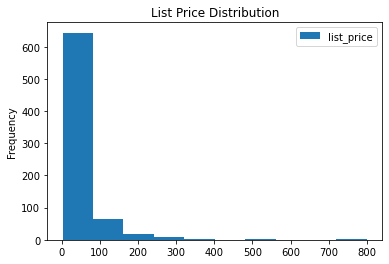

In [161]:
# Replace None with your code
list_price_dist = df['list_price'].plot(kind='hist',title = 'List Price Distribution')
plt.legend();
plt.show()

# Create a Baseline Model

Below, create a baseline model. 

To do this you must:

1. Calculate the mean of the `list_price` column in the `train` dataframe.
2. Now that you've calculate the mean of `list_price`, create a list with the same length as the `list_price` column where every value in the list is the calculated mean.
    - Store this list in the variable `baseline_preds`.

In [162]:
train = df.copy()
train = train.drop(['prod_desc','set_name','theme_name'],axis=1)
num_rows_list_price = len(train['list_price']) #the list price column has 744 rows
train

,prod_id,min_age,max_age,difficulty_level,piece_count,num_reviews,star_rating,list_price
0,60123,7,12,1,330,3.0,4.3,49.990
1,71246,7,14,1,96,3.0,4.7,30.362
2,10616,1,5,1,25,3.0,5.0,19.990
3,31079,8,12,1,379,5.0,4.4,34.990
4,42057,8,14,1,199,9.0,4.7,19.990
...,...,...,...,...,...,...,...,...
799,70921,7,14,2,425,5.0,3.2,49.990
800,41601,10,99,1,108,2.0,5.0,9.990
801,60108,5,12,2,257,8.0,3.9,39.990
802,10736,4,7,2,94,3.0,4.7,24.990


In [163]:
# Calculate the mean of the list_price column in the train dataframe.
mean = train['list_price'].mean()

# Create a list with the same length as the list_price column 
# where every value in the list is the calculated mean.
baseline_preds = [] #creating an empty list
for value in range(num_rows_list_price):
    baseline_preds.append(mean) #appending the mean to the list till the length of the list reaches a value equal to
    #the length of the list_price column
print('The list_price column has',num_rows_list_price,'rows.')
print('The baseline_preds list has',len(baseline_preds),'rows.')
print('Both have the same number of rows.')
print('The mean value of the list_price column is',mean)

The list_price column has 744 rows.
The baseline_preds list has 744 rows.
Both have the same number of rows.
The mean value of the list_price column is 49.00058198924769


Now that you have baseline predictions, you can use the predictions to calculate metrics about the model's performance. 

In [164]:
from sklearn.metrics import r2_score, mean_squared_error

# Pass the list_price column and the baseline_preds list into the function r2_score
baseline_r2 = r2_score(train.list_price, baseline_preds)

# Pass the list_price column and the baseline_preds list 
# into the function mean_squared_error and setting squared to False
baseline_rmse = mean_squared_error(train.list_price, baseline_preds, squared=False)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)

Baseline R^2:  0.0
Baseline RMSE: 73.60214730890442


**Interpret the resulting metrics for the baseline model.**

- How is the model explaining the variance of the dependent variable?
- On average, how many dollars off are the models predictions?

The results of the baseline model show an R^2 value of zero and a Baseline RMSE (root mean square error) of around 73.6.

- By definition, the variance of the dependent variable is the average of its squared deviations from its mean value.
- The baseline model relies on the simple and constant mean value of the list_price column to explain the variance of the list price dependent variable. 
- We are still not incorporating any independent variables and studying their effect on the values of the dependent variable.
- The R squared value of zero indicates that no proportion of the variance can be explained by an independent variable.
- The model explains the variance of the dependent variable by simply examining how much it deviates from its mean value.

# 2. Interpret a Correlation Heatmap to Build a Baseline Model

## Correlation Heatmap

Produce a heatmap showing the correlations between all of the numeric values in the data. The x and y axis labels should indicate the pair of values that are being compared, and then the color and the number should represent the correlation. 

The most important column or row shows the correlations betyouen the target (listing price) and other attributes.

In [165]:
# Run this cell without changes

import seaborn as sns
import numpy as np

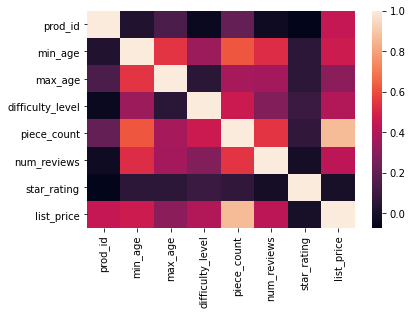

In [166]:
# Replace None with your code

corr_heatmap = sns.heatmap(train.corr()) #creating the heatmap
plt.show(corr_heatmap)

Based on the heatmap, which feature is most strongly correlated with the target (`list_price`)? In other words, which feature has the strongest positive or negative correlation — the correlation with the greatest magnitude?

Answer: 
Based on the heatmap and color scale, the feature that is most strongly correlated with the target (dependent variable) i.e. list_price is piece_count.
piece_count has the strongest positive correlation with a value of around 0.9

In [167]:
# Replace None with the name of the feature (a string)

most_correlated_feature = 'piece_count'

Create a scatter plot of that feature vs. listing price:

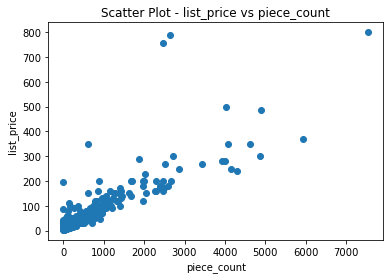

In [168]:
# Replace None with your code

#creating the scatter plot for list_price vs piece_count (Y~X) and adding a title as well as x/y labels
scatter_piece_count = plt.scatter(train['piece_count'],train['list_price'])
plt.xlabel('piece_count')
plt.ylabel('list_price')
plt.title('Scatter Plot - list_price vs piece_count')
plt.show();

Assuming you correctly identified `piece_count` (the number of pieces in the LEGO set) as the most correlated feature, you should have a scatter plot that shows a fairly clear linear relationship betyouen that feature and the target. It looks like you are ready to proceed with creating a simple linear regression model.

# 3. Build a Simple Linear Regression Model

Now, you'll build a linear regression model using just that feature. 

In the cell below, fit a statsmodels linear regression model to the data and output a summary for the model. 

In [169]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Replace None with your code
f_piece_count = 'list_price ~ piece_count' #creating the formula for the regression model
model = ols(formula = f_piece_count, data = train).fit() #fitting the model
model.summary() #printing a summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2141.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          6.91e-221
Time:                        13:00:26   Log-Likelihood:                -3749.0
No. Observations:                 744   AIC:                             7502.
Df Residuals:                     742   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4565      1.593      7.192      0.000       8.329      14.584
piece_count     0.0875      0.002     46.273      0.000       0.084       0.091
==============================================================================
Omnibus:                     1141.526   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464258.231
Skew:                           8.756   Prob(JB):                         0.00
Kurtosis:                     124.117   Cond. No.                         978.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Interpret the Simple Linear Regression Model

Now that the model has been fit, you should interpret the model parameters. 

Specifically:
- What do the coefficients for the intercept and independent variable suggest about the dependent variable?
- Are the coefficients found to be statistically significant?
- What are the confidence intervals for the coefficients?
- Do the relationships found by the model seem plausible? 

*YOUR ANSWER HERE*
- Coefficient for the Intercept: is the expected mean value of the dependent variable (list_price) when the independent variable (piece_count) has a value of zero. In other words, it is the y-intercept of the linear regression equation. The model summary shows a value of 11.4565 for the coefficient of intercept which means that the expected list_price when the piece_count = 0 is 11.4565 USD. However, this is meaningless! The reason behind that is there is no puzzle sold with a piece_count of zero or else we wouldn't call it a puzzle. The intercept coefficient does not tell us anything about the dependent variable in this case so it is statistically insignificant.

- Coefficient for the piece_count: is a coefficient that tells us by how much the dependent variable (list_price) will increase (if the coefficient is positive) or decrease (if the coefficient is negative) when the value of the independent variable increases by 1. The model summary shows a piece_count coefficient of 0.0875. This means that with every extra piece we have in the puzzle, the puzzle set would be 0.0875 USD more expensive. Alternatively, there is an 8.75 USD extra charge for every 100 additional pieces in the set.

- The coefficient of the intercept is not statistically significant while the coefficient of the piece_count is. The latter gives us insight into how the number of pieces in the puzzle directly affects the price (more pieces means a higher manufacturing cost which means a higher price!).

- We will ignore the other coefficients of the intercept (std error, t, P>|t| and the confidence interval). All of the intercept's coefficients are statistically insignificant.

- std err of the piece_count: is the basic standard error of the estimate of the piece_count coefficient. In other words, it reflects the model accuracy in terms of the effect of an increase in the value of the independent variable on the value of the dependent variable. The model summary shows a std error of only 0.002 which is negligible. This shows that there isn't much room for error when we're examining the coefficient of piece_count and the amount by which the dependent variable (list_price) increases with every increase in the piece_count by 1 unit. The std error is only about 2.2% of the coefficient's value. Accordingly, the std error is statistically significant.

- t of the piece_count: the model summary produces a t-value of 46.273 which is high and accordingly supports the statistical significance of the piece_count coefficient and provides more evidence against the null hypothesis (that no relationship exists between the list_price and piece_count). 

- P>|t|: the model produces a p-value of 0.00 which means there is no chance that the null hypothesis is true (i.e. that there is no statistically significant relationship between the list_price and the piece_count which also means that the correlation coefficient is equal to zero). This supports the idea that a strong relationship exists between the list_price and piece_count. 

- 95% CI Lower & Upper Values: the model summary shows that the lower and upper values of the 95% CI are 0.084 and 0.091, respectively. We can say that the interval is relatively narrow. The estimated value of the coefficient is 0.0875. The upper and lower values of the 95% CI are only 4% off the estimated value which is not alot. This also reflects the statistical significance of the relationship between the list_price and piece_count. In other words, our model is more accurate.

- the relationship between list_price and piece_count found by the model is definitely plausible.

# 5. Evaluate the Simple Linear Regression Model

Now that the model parameters have been interpreted, the model must be assessed based on predictive metrics and whether or not the model is meeting the assumptions of linear regression. 

### Compare the $R^2$ and the Root Mean Squared Error of the simple linear regression model with the baseline model. 

In [170]:
# Replace None with your code
model_r2 = model.rsquared #finding the R2 value of the model

model_pred = [] #creating an empty list to append the values of list_price predicted by the model
for value in (df['list_price']): 
    model_pred.append(value)

model_rmse = mean_squared_error(train.list_price, model_pred, squared=False) #finding the RMSE of the simple linear regression
#model and comparing it to those of the baseline model

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('----------------------------')
print('Regression R^2: ', model_r2)
print('Regression RMSE:', model_rmse)

Baseline R^2:  0.0
Baseline RMSE: 73.60214730890442
----------------------------
Regression R^2:  0.7426440497844149
Regression RMSE: 0.0


### Interpret the model metrics

R Squared Values:
- The calculations above show that the simple linear regression model produces a MUCH more satisfactory value of R2 compared to the baseline model. 

- The baseline model, as mentioned earlier, normally has an R2 value of zero as there is practically zero difference between the model's predicted values and the mean as the model itself follows the mean. 

- Our simple linear regression model has an R squared value of 0.742 which means that 74.2% of the variance in the dependent variable's (list_price) value is explained by the model and by the changes in the independent variable (piece_count). This is pretty satisfactory and again supports the hypothesis that there is a strong relationship between the list_price and the piece_count. 

- RMSE is an indication of how far the observed values (of the list_price) are from the model's predicted values. The baseline model has an RMSE of 73.6 which is a huge value in terms of price in USD! As for the simple regression model, the RMSE value is 0.0 which means that the observed values are very close to the model's predicted values. the latter again proves that a strong and statistically significant relationship exists between the list_price and piece_count.


### Check the assumptions of simple linear regression

#### Investigating Linearity

First, let's check whether the linearity assumption holds.

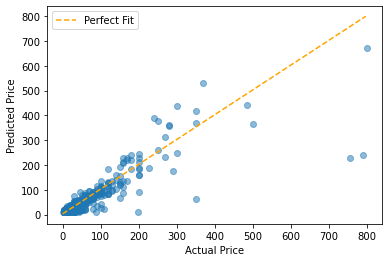

In [171]:
# Run this cell without changes

preds = model.predict()
fig, ax = plt.subplots()

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are you violating the linearity assumption?

The linearity assumption is satisfied as the regression model hits the vast majority of the observed values while keeping a perfectly linear shape. Some outliers exist that might be removed as their count is negligible compared to the count of observed values which lie exactly on or very close to the perfect fit line.

#### Investigating Normality

Now let's check whether the normality assumption holds for our model.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


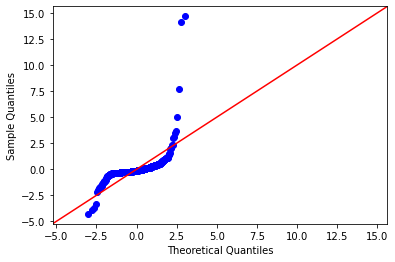

In [172]:
# Run this code without changes
import scipy.stats as stats
import statsmodels.api as sm

residuals = (df.list_price - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are you violating the normality assumption?

Visual inspection of the QQ plot is not enough to confirm the violation of the normality assumption. The QQ plot is pretty satisfactory as most of the poinrs lie close to the 45 degree line with a tiny bit of deviation and a very small number of outliers. 

#### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

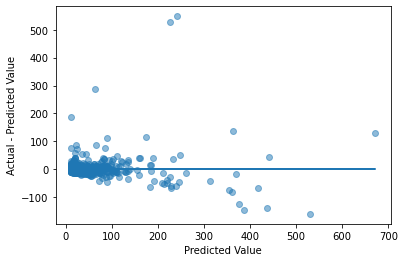

In [173]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are you violating the homoscedasticity assumption?

The plot above does not produce any cone shapes which would reflect heteroscedasticity. Homoscedasticity is satisfied. The small number of outliers that are far from the regression line will have a negligible impact and is nowhere near enough to violate homoscedasticity.

### Linear Regression Assumptions Conclusion

Given your answers above,how should you interpret our model's coefficients? Do you have a model that can be used for inferential as well as predictive purposes? What might your next steps be?

- Model Coefficients: As mentioned earlier, the coefficients of the independent variable (piece_count) shown in the model summary all support the hypothesis that a statistically significant relationship exists between the list_price and the piece_count. The estimate of the correlation coefficient itself shows that the list price inreases by 8.75USD for every 100 additional pieces in the puzzle set ; which makes alot of sense when we consider that there's a puzzle on sale with more than 7,500 pieces! The std error in the estimate of the coefficient is negligible which provide more proof of the model's satisfactory accuracy and evidence against the null hypothesis (that no statistically significant relationship exists between the list_price and piece_count). The t-value is also pretty high and satisfactory which means that there's even more evidence that a relationship exists and that the variation of list_price as a function of piece_count is not purely from random chance. Last but not least, the P-value of 0 and the very narrow 95% CI all support the alternative hypothesis.

- The model can be used for inferential and predictive purposes the way it is however it could perform better with some cleaning. That mainly has to do with the small number of outliers that can be removed without affecting the quality of the data in the model. My next step would be do remove outliers and repeat the analysis to see how the plots would differ.

# Level Up: Project Enhancements

After completing the project, you could consider the following enhancements if you have time:

* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function
* Identify lego sets with high or low value for LEGO buyers, using the differences betyouen actual and predicted prices
* [Log the target variable](https://www.codegrepper.com/code-examples/python/log+transform+pandas+dataframe) and see if that improves the model assumptions.
* Conduct statistical tests using the numeric features in the dataset to make inferences about the population of LEGO sets

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements.

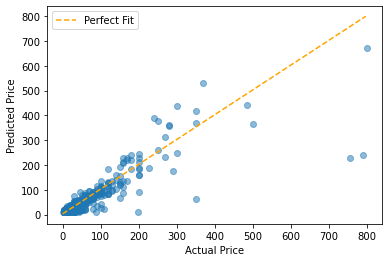

In [174]:
#recreating the regression plot
preds = model.predict()
fig, ax = plt.subplots()

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

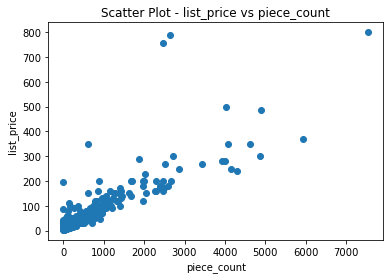

In [175]:
#recreating the scatter plot
scatter_piece_count = plt.scatter(train['piece_count'],train['list_price'])
plt.xlabel('piece_count')
plt.ylabel('list_price')
plt.title('Scatter Plot - list_price vs piece_count')
plt.show();

In [176]:
#finding and removing the outliers

import numpy as np

#indices of the outliers
print('The indices of the outliers are \n',np.where((train['piece_count'] > 2000) & (train['list_price'] > 700)))

print(' \n First outlier data: \n',train.iloc[105]) #first outlier data
print(' \n Second outlier data: \n',train.iloc[541]) #second outlier data
print(' \n Third outlier data: \n',train.iloc[634]) #third outlier data

#Now we want to remove these outliers and then redo the analysis
train = train.drop([train.index[105], train.index[541], train.index[634]])

The indices of the outliers are 
 (array([105, 541, 634]),)
 
 First outlier data: 
 prod_id             75192.00
min_age                16.00
max_age                99.00
difficulty_level        3.00
piece_count          7541.00
num_reviews           197.00
star_rating             4.80
list_price            799.99
Name: 117, dtype: float64
 
 Second outlier data: 
 prod_id             2000431.00
min_age                   6.00
max_age                  99.00
difficulty_level          2.00
piece_count            2455.00
num_reviews               8.00
star_rating               3.40
list_price              754.99
Name: 586, dtype: float64
 
 Third outlier data: 
 prod_id             2000430.00
min_age                   6.00
max_age                  99.00
difficulty_level          1.00
piece_count            2631.00
num_reviews               7.00
star_rating               4.60
list_price              789.99
Name: 682, dtype: float64


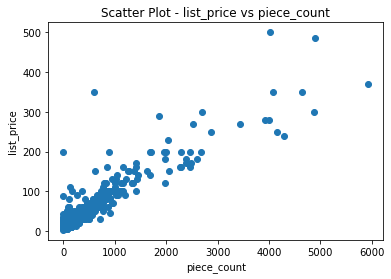

In [177]:
#recreating the scatter plot after removing the outliers
scatter_piece_count = plt.scatter(train['piece_count'],train['list_price'])
plt.xlabel('piece_count')
plt.ylabel('list_price')
plt.title('Scatter Plot - list_price vs piece_count')
plt.show();

In [178]:
#removing more outliers

#identifying the indices of the outliers we want to remove
print('The indices of the outliers are \n',np.where((train['piece_count'] > 4000) & (train['list_price'] > 350)))
print('and',np.where((train['piece_count'] < 1000) & (train['list_price'] > 300)))

print(' \n First outlier data: \n',train.iloc[16]) #first outlier data
print(' \n Second outlier data: \n',train.iloc[378]) #second outlier data
print(' \n Third outlier data: \n',train.iloc[701]) #third outlier data
print(' \n Fourth outlier data: \n',train.iloc[439]) #fourth outlier data

#removing the outliers
train = train.drop([train.index[16], train.index[378], train.index[701], train.index[439]])

The indices of the outliers are 
 (array([ 16, 378, 701]),)
and (array([439]),)
 
 First outlier data: 
 prod_id             75159.00
min_age                14.00
max_age                99.00
difficulty_level        3.00
piece_count          4016.00
num_reviews            84.00
star_rating             3.90
list_price            499.99
Name: 16, dtype: float64
 
 Second outlier data: 
 prod_id             10256.00
min_age                16.00
max_age                99.00
difficulty_level        3.00
piece_count          5923.00
num_reviews            43.00
star_rating             4.80
list_price            369.99
Name: 412, dtype: float64
 
 Third outlier data: 
 prod_id             2000409.00
min_age                   6.00
max_age                  99.00
difficulty_level          1.00
piece_count            4900.00
num_reviews               2.00
star_rating               5.00
list_price              484.99
Name: 764, dtype: float64
 
 Fourth outlier data: 
 prod_id             31313.00


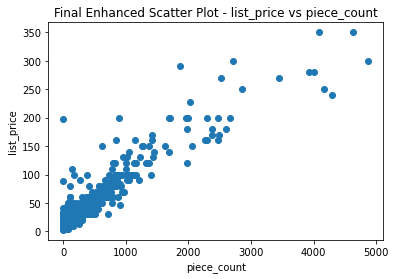

In [179]:
#recreating the scatter plot
scatter_piece_count = plt.scatter(train['piece_count'],train['list_price'])
plt.xlabel('piece_count')
plt.ylabel('list_price')
plt.title('Final Enhanced Scatter Plot - list_price vs piece_count')
plt.show();

The plot above looks so much better with almost all data points being close together!! I believe that's all for removing outliers...at least the extreme ones. 

In [180]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2141.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          6.91e-221
Time:                        13:00:30   Log-Likelihood:                -3749.0
No. Observations:                 744   AIC:                             7502.
Df Residuals:                     742   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4565      1.593      7.192      0.000       8.329      14.584
piece_count     0.0875      0.002     46.273      0.000       0.084       0.091
==============================================================================
Omnibus:                     1141.526   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464258.231
Skew:                           8.756   Prob(JB):                         0.00
Kurtosis:                     124.117   Cond. No.                         978.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
f_piece_count_enhanced = 'list_price ~ piece_count' 
model_enhanced = ols(formula = f_piece_count_enhanced, data = train).fit() 
model_enhanced.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     4137.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          4.42e-304
Time:                        13:00:30   Log-Likelihood:                -3226.1
No. Observations:                 737   AIC:                             6456.
Df Residuals:                     735   BIC:                             6465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.9919      0.850     16.463      0.000      12.323      15.660
piece_count     0.0759      0.001     64.316      0.000       0.074       0.078
==============================================================================
Omnibus:                      500.525   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12840.388
Skew:                           2.655   Prob(JB):                         0.00
Kurtosis:                      22.747   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the new model summary and comparing it to that of the original model (with the outliers):

- R Squared: The enhanced model (with the outliers removed) has an R squared value of 0.849 which is higher than that of the original model ; 0.743. 74.3% of the variance in the list_price was explained by the changes in piece_count according to the original model. With the enhanced model, now 84.9% of the variance can be explained by the changes in piece_count which is a much more satisfactory outcome. That is due to removing the extreme outliers which do not align with the predictions of the regression model. The outliers show weird value of list_price at certain piece_count values due to random chance. This shows that our model is working better now after removing the extreme outliers from the scatter plot of Y~X.

- Coefficient section: Looking at the estimate of the coefficient for piece_count, the new value is 0.0759 compared to the 0.0875 in the original model. the estimate of the coefficient changed a little bit after removing the outliers which obviously makes the prediction more accurate. However, an interesting observation is that the std error of the coefficient is even less now at 0.001 instead of 0.002! The latter means that we are pretty confident of the estimated correlation coefficient. Moving on to the t-value, we get a higher value of 64.3 compared to the 46.2 we had in the original model. This provides even more evidence against the null hypothesis (that no statistically significant relationship exists). The p-value is still zero as in the original regression model. As for the 95% CI, the interval is even narrower than it was in the original regression model and that also reflects the enhanced accuracy of the revised model.

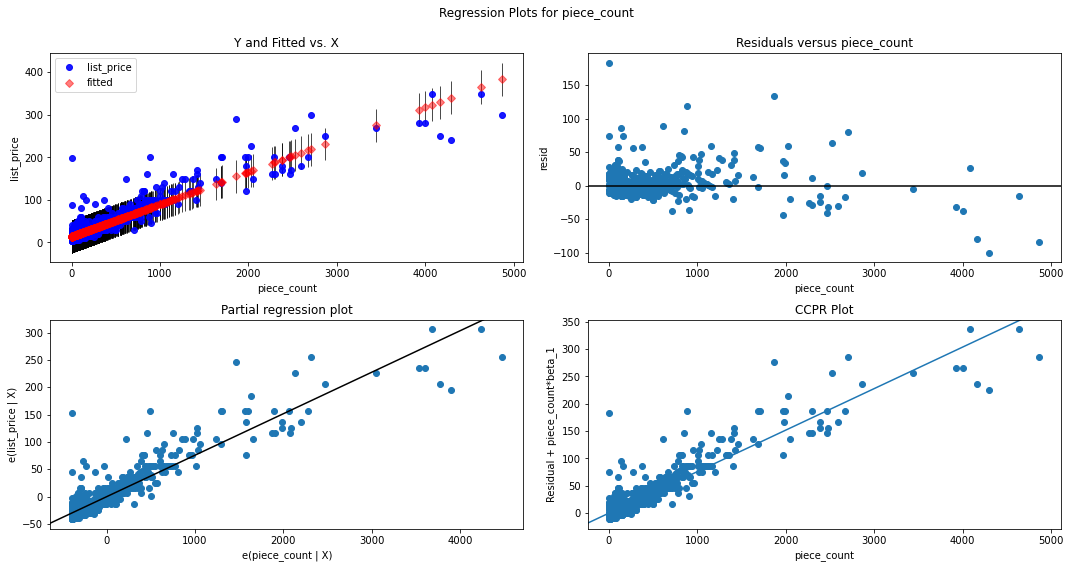

In [182]:
#visualizing the error terms
#Identify lego sets with high or low value for LEGO buyers, using the differences betyouen actual and predicted prices
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_enhanced, "piece_count", fig=fig)
plt.show()

Generally, I believe that when certain LEGO sets have higher value for buyers, they would generally want to buy them more. More demand on these means a more predictable price that can be determined more accurately by the regression model. 

In [183]:
model_enhanced.resid #showing the residuals values of the enhanced model

0      10.942852
1       9.081278
2       4.099945
3      -7.777468
4      -9.110987
         ...    
799     3.729986
800   -12.201821
801     6.485369
802     3.861127
803    -5.618442
Length: 737, dtype: float64

I will be extracting the indices of the lego sets with residuals values less than -50 and greater than 100.

In [184]:
#showing the min and max price out of curiousity
print('the cheapest puzzle set is sold at',train.list_price.min())
print('the most expensive puzzle set is sold at',train.list_price.max())

the cheapest puzzle set is sold at 2.49
the most expensive puzzle set is sold at 349.99


In [185]:
resid_list = list(model_enhanced.resid) #converting the residuals pandas series to a list
indices_low_value = [] #creating an empty list to append the indices of low value sets into it
for i in range(len(resid_list)): #looping through the residuals list
    if resid_list[i] > 100 or resid_list[i] < -50: #and extracting the indices of the values with residuals >100 or <-50
        indices_low_value.append(i)
print('The indices of puzzle sets with low value for buyers is:',indices_low_value) #the list of indices
print(' \n The first puzzle set:',train.iloc[126],'\n') #first set info
print(' \n The second puzzle set:',train.iloc[423],'\n') #second set info
print(' \n The third puzzle set:',train.iloc[597],'\n') #third set info
print(' \n The fourth puzzle set:',train.iloc[666],'\n') #fourth set info
print(' \n The fifth puzzle set:',train.iloc[699],'\n') #fifth set info 
print(' \n The sixth puzzle set:',train.iloc[720],'\n') #sixth set info

The indices of puzzle sets with low value for buyers is: [126, 423, 597, 666, 699, 720]
 
 The first puzzle set: prod_id             60052.00
min_age                 6.00
max_age                12.00
difficulty_level        2.00
piece_count           888.00
num_reviews            35.00
star_rating             4.40
list_price            199.99
Name: 143, dtype: float64 

 
 The second puzzle set: prod_id             10214.00
min_age                16.00
max_age                99.00
difficulty_level        3.00
piece_count          4295.00
num_reviews           228.00
star_rating             4.80
list_price            239.99
Name: 462, dtype: float64 

 
 The third puzzle set: prod_id             10253.00
min_age                16.00
max_age                99.00
difficulty_level        3.00
piece_count          4163.00
num_reviews            64.00
star_rating             4.60
list_price            249.99
Name: 650, dtype: float64 

 
 The fourth puzzle set: prod_id             70620.00
m

In [186]:
#compiling the data cleaning code into a function
#This function should take a pandas dataframe, a dependent variable string name and an independent variable string name
#as arguments and should do the following
# 1) Check for null values in the dependent variable column and remove them
# 2) Replace any spaces in the column names with an uderscore
# 3) Set the data types to int or float
# 4) Drop any duplicates

def data_cleaning_part1(dataframe):
    dataframe.columns = dataframe.columns.str.replace(' ','_')
    dataframe.columns = dataframe.columns.str.lower()
    dataframe = dataframe.drop_duplicates()
    return dataframe
def data_cleaning_part2(dataframe,x):
    data_cleaning_part1(dataframe)
    dataframe[x] = dataframe[x].apply(lambda x: str(x).replace("$",''))

In [187]:
conn = sqlite3.connect('data/legos.db')
q = """
SELECT * 
FROM difficulty AS d
JOIN product_info AS p
ON d."Prod Id" = p."Prod Id"
JOIN metrics AS m
ON d."Prod Id" = m."Prod Id"
"""
test_df = pd.read_sql(q,conn)

In [188]:
data_cleaning_part2(test_df,"list_price")

In [189]:
test_df

,prod_id,min_age,max_age,difficulty_level,prod_id,set_name,prod_desc,theme_name,piece_count,prod_id,num_reviews,star_rating,list_price
0,60123,7.0,12.0,1,60123,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,60123,3.0,4.3,49.99
1,71246,7.0,14.0,1,71246,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,71246,3.0,4.7,30.362
2,10616,1.5,5.0,1,10616,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,10616,3.0,5.0,19.99
3,31079,8.0,12.0,1,31079,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,31079,5.0,4.4,34.99
4,42057,8.0,14.0,1,42057,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,42057,9.0,4.7,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,60146,5.0,12.0,1,60146,Stunt Truck,Strap in and jump some ramps!,City,91,60146,8.0,4.8,9.99
880,70313,8.0,14.0,2,70313,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,70313,3.0,4.7,19.99
881,70313,8.0,14.0,2,70313,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,70313,3.0,4.7,None
882,70313,8.0,14.0,2,70313,Moltor’s Lava Smasher,Smash Aaron Fox out of the way and capture the...,NEXO KNIGHTS™,187,70313,3.0,4.7,19.99


In [190]:
test_df.isnull().sum()

prod_id               0
min_age               0
max_age               0
difficulty_level      0
prod_id               0
set_name              0
prod_desc            20
theme_name            0
piece_count           0
prod_id               0
num_reviews         103
star_rating         103
list_price            0
dtype: int64

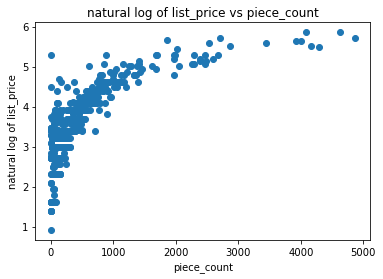

In [191]:
#logging the target variable (natural log)
train['list_price'] = np.log(train['list_price']) #taking the log of the list_price column
#recreating the plots we did above
scatter_piece_count = plt.scatter(train['piece_count'],train['list_price'])
plt.xlabel('piece_count')
plt.ylabel('natural log of list_price')
plt.title('natural log of list_price vs piece_count')
plt.show();

We can see that taking the log of the target variable produced a scatter plot that will require a more complicated regression model that isn't simple linear. A linear regression model will not produce a good fit in this case. Let's try!!

In [192]:
formula_log ='list_price ~ piece_count' 
model_log = ols(formula = formula_log, data = train).fit() 
model_log.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     898.4
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          1.40e-129
Time:                        13:00:32   Log-Likelihood:                -651.86
No. Observations:                 737   AIC:                             1308.
Df Residuals:                     735   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9438      0.026    113.885      0.000       2.893       2.995
piece_count     0.0011   3.59e-05     29.973      0.000       0.001       0.001
==============================================================================
Omnibus:                       42.828   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.655
Skew:                          -0.502   Prob(JB):                     3.02e-13
Kurtosis:                       3.932   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just taking a quick peek of the above model summary, we get an R squared value of 0.55 which is pretty low compared to the other regression models we tested. This shows that linear regression isn't really working well here.

In [193]:
train

,prod_id,min_age,max_age,difficulty_level,piece_count,num_reviews,star_rating,list_price
0,60123,7,12,1,330,3.0,4.3,3.911823
1,71246,7,14,1,96,3.0,4.7,3.413192
2,10616,1,5,1,25,3.0,5.0,2.995232
3,31079,8,12,1,379,5.0,4.4,3.555062
4,42057,8,14,1,199,9.0,4.7,2.995232
...,...,...,...,...,...,...,...,...
799,70921,7,14,2,425,5.0,3.2,3.911823
800,41601,10,99,1,108,2.0,5.0,2.301585
801,60108,5,12,2,257,8.0,3.9,3.688629
802,10736,4,7,2,94,3.0,4.7,3.218476


In [194]:
#performing multiple regression with all numeric predictors (piece count, num reviews, star rating)
mult_reg_train = train.head(10)
x_axis = mult_reg_train[['piece_count','num_reviews','star_rating']] #predictor variables
y_axis = mult_reg_train['list_price'] #dependent variable

from sklearn import linear_model

regr = linear_model.LinearRegression() #creating a linear regression object
regr.fit(x_axis,y_axis) #filling the regression object with data that describes the relationship between the parameters
#in x_axis and y_axis

#for fun
avg_num_reviews = sum(mult_reg_train['num_reviews'])/len(mult_reg_train['num_reviews'])
avg_star_rating = sum(mult_reg_train['star_rating'])/len(mult_reg_train['star_rating'])
avg_piece_count = sum(mult_reg_train['piece_count'])/len(mult_reg_train['piece_count'])

#predict the list price when the 3 numeric predictors have values equal to their respective mean
predictedListPrice = regr.predict([[avg_piece_count,avg_num_reviews,avg_star_rating]])
print("The predicted list price when all 3 numeric predictors have a value equal to their respective mean is:",predictedListPrice)


The predicted list price when all 3 numeric predictors have a value equal to their respective mean is: [3.65905479]
